<a href="https://colab.research.google.com/github/Srijita264/Coronavirus-Fake-News-Classification/blob/main/Copy_of_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###This code defines a Python function and a series of data preprocessing steps for evaluating a Random Forest Classifier's performance on a given dataset.

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

#####A function '**plot_confusion_matrix**' to visualize a confusion matrix for evaluating the performance of a machine learning model. The function takes parameters such as the confusion matrix (cm), target class names (target_names), title, color map (cmap), and normalization flag (normalize). It calculates accuracy and misclassification rates, sets default values for some parameters, and then uses the matplotlib library to generate a heatmap of the confusion matrix. The matrix is annotated with values, and if normalization is enabled, the values are displayed as proportions.

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

#####A text cleaning function, '**cleantext**', which processes textual data by converting it to lowercase, removing URLs, special characters, and common English stopwords. The training and validation datasets are then cleaned using this function.

In [ ]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Train_Data.csv')
val = pd.read_csv  ('/content/drive/MyDrive/Validation_Data.csv')

In [ ]:
train['tweet'] = train['tweet'].map(lambda x: cleantext(x))
val['tweet'] = val['tweet'].map(lambda x: cleantext(x))


#####'**print_metrics**' function prints various classification metrics such as confusion matrix, precision, recall, accuracy, and F1 score.

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))


#####A machine learning pipeline using scikit-learn. The pipeline consists of a Bag-of-Words representation (CountVectorizer), TF-IDF transformation (TfidfTransformer), and a Random Forest Classifier. The model is trained on the training dataset, and its performance is evaluated on a validation set. The confusion matrix and classification metrics are then printed using the defined functions.

Random Forest
val:
[[ 984   82]
 [ 154 1007]]
              precision    recall  f1-score   support

        fake       0.86      0.92      0.89      1066
        real       0.92      0.87      0.90      1161

    accuracy                           0.89      2227
   macro avg       0.89      0.90      0.89      2227
weighted avg       0.90      0.89      0.89      2227

Accuracy :  0.8940278401436911
Precison :  0.8958293336589304
Recall :  0.8940278401436911
F1 :  0.893992451981416


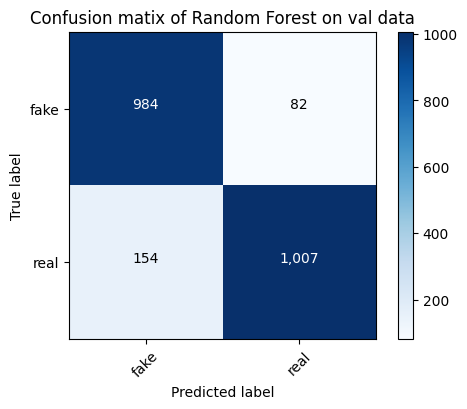

In [ ]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', RandomForestClassifier())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Random Forest')
print ('val:')
pred=pipeline.predict(val['tweet'])

print_metrices(pred,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of Random Forest on val data')

